In [ ]:
import numpy as np
import pandas as pd

In [ ]:
!pip uninstall -y xgboost
!pip install xgboost==1.7.5

Found existing installation: xgboost 1.7.5
Uninstalling xgboost-1.7.5:
  Successfully uninstalled xgboost-1.7.5
  Using cached xgboost-1.7.5-py3-none-manylinux2014_x86_64.whl.metadata (1.9 kB)
Using cached xgboost-1.7.5-py3-none-manylinux2014_x86_64.whl (200.3 MB)


In [ ]:
!pip uninstall -y scikit-learn
!pip install scikit-learn==1.5.2

Found existing installation: scikit-learn 1.5.2
Uninstalling scikit-learn-1.5.2:
  Successfully uninstalled scikit-learn-1.5.2
  Using cached scikit_learn-1.5.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (13 kB)
Using cached scikit_learn-1.5.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.3 MB)


In [ ]:
import seaborn as sns
import xgboost as xgb

In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
white_df = pd.read_csv('/content/winequality-white.csv')

In [ ]:
white_df.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.994,3.3,0.49,9.5,6


In [ ]:
red_df = pd.read_csv('/content/winequality-red.csv')

In [ ]:
red_df.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5


In [ ]:
red_white_df = pd.concat([white_df,red_df])

In [ ]:
red_white_df.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.994,3.3,0.49,9.5,6


In [ ]:
#shuffling data
wine_df = red_white_df.sample(frac=1).reset_index(drop=True)
wine_df.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,5.7,0.26,0.27,4.10,0.201,73.5,189.5,0.9942,3.27,0.38,9.4,6
1,5.8,0.33,0.20,16.05,0.047,26.0,166.0,0.9976,3.09,0.46,8.9,5


In [ ]:
wine_df['quality'] = [0 if x < 6 else 1 for x in wine_df['quality']]
wine_df['quality'].value_counts(normalize=True)

,proportion
quality,
1,0.633061
0,0.366939


In [ ]:
X = wine_df.drop('quality',axis=1)
y = wine_df['quality']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,test_size=0.15,random_state=42)

In [ ]:
#XGBoost expects data in DMatrix format
dmatrix_train = xgb.DMatrix(data=X_train,label=y_train)
dmatrix_test = xgb.DMatrix(data=X_test,label=y_test)

In [ ]:
# The XGBoost Python package allows choosing between two APIs.
# The Scikit-Learn API has objects XGBRegressor and XGBClassifier trained via calling fit.
#  XGBoost's own Learning API has xgboost.train.

In [ ]:
learning_objective = {
    'objective' : 'binary:logistic'
}

In [ ]:
xgb_model = xgb.train(params=learning_objective, dtrain=dmatrix_train)

In [ ]:
y_pred = xgb_model.predict(dmatrix_test)

round_test_predictions = [round(p) for p in y_pred]

In [ ]:
accuracy_score(y_test,round_test_predictions)

0.7682051282051282

In [ ]:
params_grid = {
    'learning_rate': [0.01, 0.05],
    'gamma':[0, 0.01],
    'max_depth': [6, 7],
    'min_child_weight': [1, 2, 3,],
    'subsample': [0.6, 0.7,],
    'n_estimators': [400, 600, 800],
    'colsample_bytree':[0.7, 0.8],
}

In [ ]:
xgb_classifier = xgb.XGBClassifier()

In [ ]:
grid = GridSearchCV(xgb_classifier, params_grid, scoring='accuracy', cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'colsample_bytree': [0.7, 0.8], 'gamma': [0, 0.01],
                         'learning_rate': [0.01, 0.05], 'max_depth': [6, 7],
                         'min_child_weight': [1, 2, 3],
                         'n_estimators': [400, 600, 800],
                         'subsample': [0.6, 0.7]},
             scoring='accuracy')

In [25]:
best_parameters = grid.best_params_
best_parameters

{'colsample_bytree': 0.7,
 'gamma': 0.01,
 'learning_rate': 0.05,
 'max_depth': 7,
 'min_child_weight': 1,
 'n_estimators': 400,
 'subsample': 0.7}

In [26]:
pred = grid.predict(X_test)

In [27]:
accuracy_score(y_test,pred)

0.8235897435897436

In [30]:
cm = ConfusionMatrixDisplay(confusion_matrix(y_test,pred))

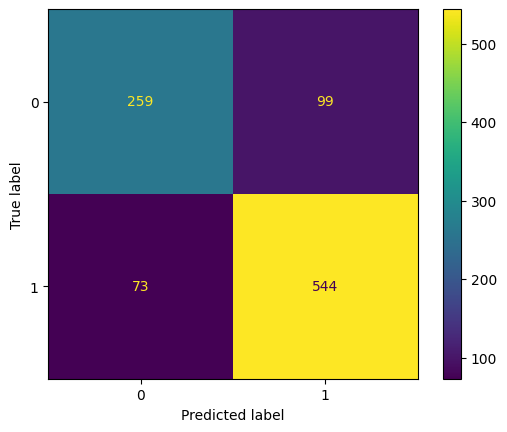

In [31]:
cm.plot()